**Question 1** : In the folowing definition of a probabilistic model:

$Y \sim \mathcal{N}(\mu, \sigma)$

$\mu \sim \mathcal{N}(0, 2)$

$\sigma \sim \mathcal{halfnormal}(0.75)$

1.1 - Identify the prior and the likelihood.

1.2  - How many parameters will the posterior have?

1.3 - Compare it with the model for the coin-flipping problem.

1.4 - Write Bayes' theorem for the model.


1.1 Prior: $\mu$, $\sigma$

Likelihood: $Y$

1.2 Posterior will have 2 parameters

1.3 In coin-flipping problem, prior followed beta distribution and likelihood followed binomial distriubution.

In this problem, we have two parameters in prior. One follows normal distribution and other follows halfnormal distribution. Likelihood follows normal distribution.



1.4  $P(μ,σ∣Y) = \frac{P(Y)}{P(Y∣μ,σ)P(μ)P(σ)}$

**Question 2**

Let’s suppose that we have two coins; when we toss the first coin, half of the time it lands on tails
 and half of the time on heads. The other coin is a loaded coin that always lands on heads. If we take
 one of the coins at random and get a head, what is the probability that this coin is the unfair one?

E1: picking First coin

E2: Picking Second coin
$$
P(E2)=x
$$
$$
P(E1)=1-x
$$
$$
P(H|E1)= 1/2
$$

$$
P(H|E2)= 1
$$

$$
P(E2|H)= \frac{P(H|E2)P(E2)}{P(H)}
$$

$$
P(E2|H)= \frac{P(H|E2)P(E2)}{P(H|E2)P(E2)+P(H|E1)P(E1)}
$$

$$
P(E2|H)= \frac{P(E2)}{P(E2)+P(E1)/2}
$$


In [ ]:
# Setting up the dependencies: (DONOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz
from cycler import cycler
import math

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.4/468.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: arviz
    Found exist

In [ ]:
from scipy.stats import beta
import pandas as pd
import pymc as pm

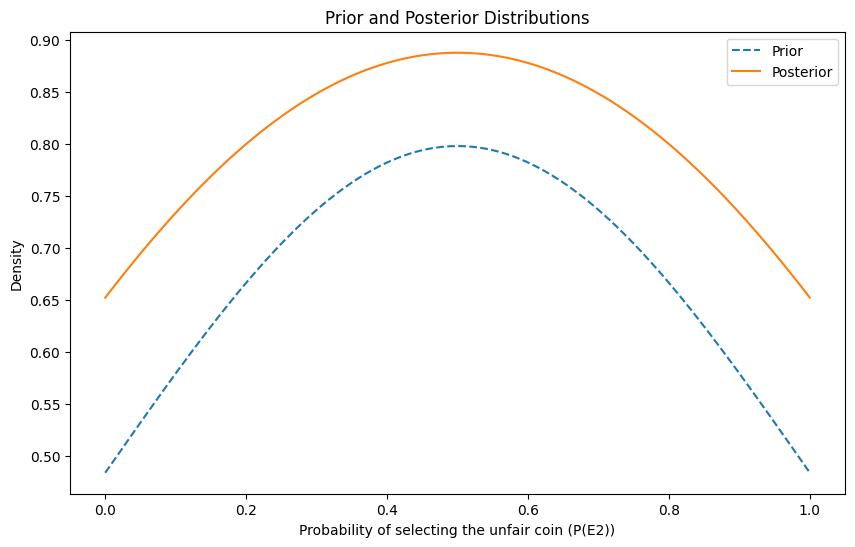

Maximum probability of selecting the unfair coin given that we observed a head: 0.4997498749374687


In [ ]:
data=1
x = np.linspace(0, 1, 2000) #P(E2)

prior = pz.Normal(0.5,0.5)
prior_probs = prior.pdf(x)

P_H = prior_probs * 1 + (1 - prior_probs) * 0.5

# Use Bayes' theorem to calculate the posterior probability P(E2 | H)
posterior_probs = (prior_probs) / P_H


# Plot the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(x, prior_probs, label='Prior', linestyle='--')
plt.plot(x, posterior_probs, label='Posterior', linestyle='-')
plt.xlabel('Probability of selecting the unfair coin (P(E2))')
plt.ylabel('Density')
plt.legend()
plt.title('Prior and Posterior Distributions')
plt.show()

# Select the result where P(E2 | H) is maximum
max_index = np.argmax(posterior_probs)
max_prob = x[max_index]

print("Maximum probability of selecting the unfair coin given that we observed a head:", max_prob)

**Question 3**


Using PyMC, change the parameters of the prior Beta distribution in `our_first_model` to match those of Week 2. Compare the results.

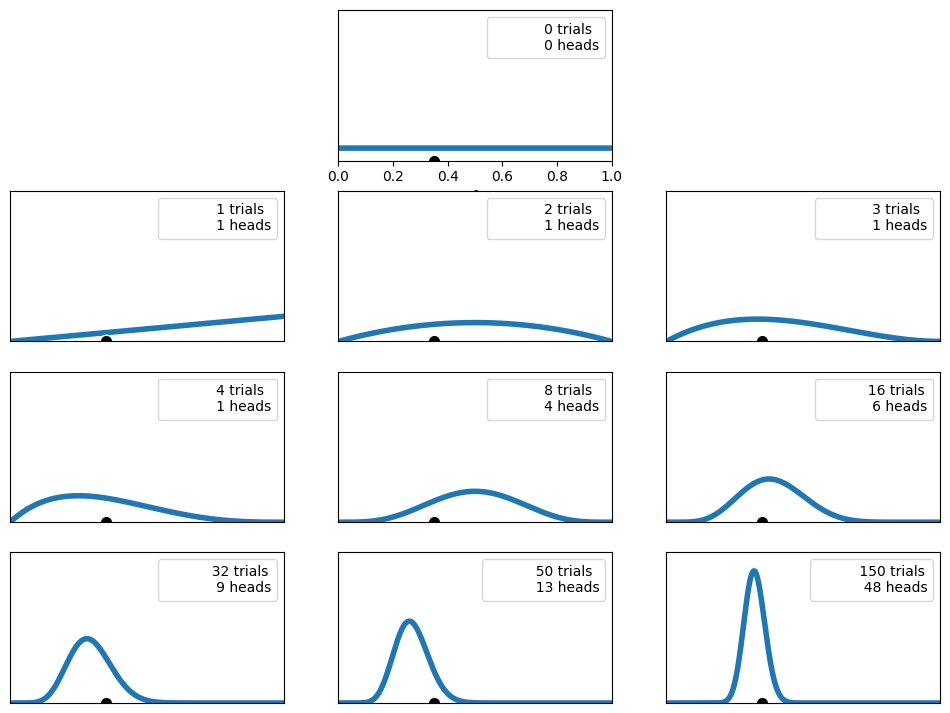

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Data for comparison
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

# Parameters of the Beta distributions from Week 2
beta_params = [(1, 1), (20, 20), (1, 4)]
selected_beta_params = beta_params[0]  # Choose any tuple from beta_params for comparison

# Generate x values for plotting
x = np.linspace(0, 1, 2000)

# Plotting the Beta distributions from Week 2 for the selected tuple
plt.figure(figsize=(12, 9))
for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]

    # Use the selected tuple for Beta distribution
    alpha_prior, beta_prior = selected_beta_params
    posterior = beta(alpha_prior + y, beta_prior + N - y).pdf(x)
    plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

plt.savefig("beta_binomial_posterior_week2_selected.png")


<ipython-input-41-b74e09b3bb19>:4: RuntimeWarning: invalid value encountered in divide
  y = pm.Bernoulli('y', p=θ, observed=np.array(n_heads) / np.array(n_trials))
/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1342: RuntimeWarning: invalid value encountered in cast
  data = convert_observed_data(data).astype(rv_var.dtype)
/usr/local/lib/python3.10/dist-packages/pymc/model/core.py:1365: ImputationWarning: Data in y contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


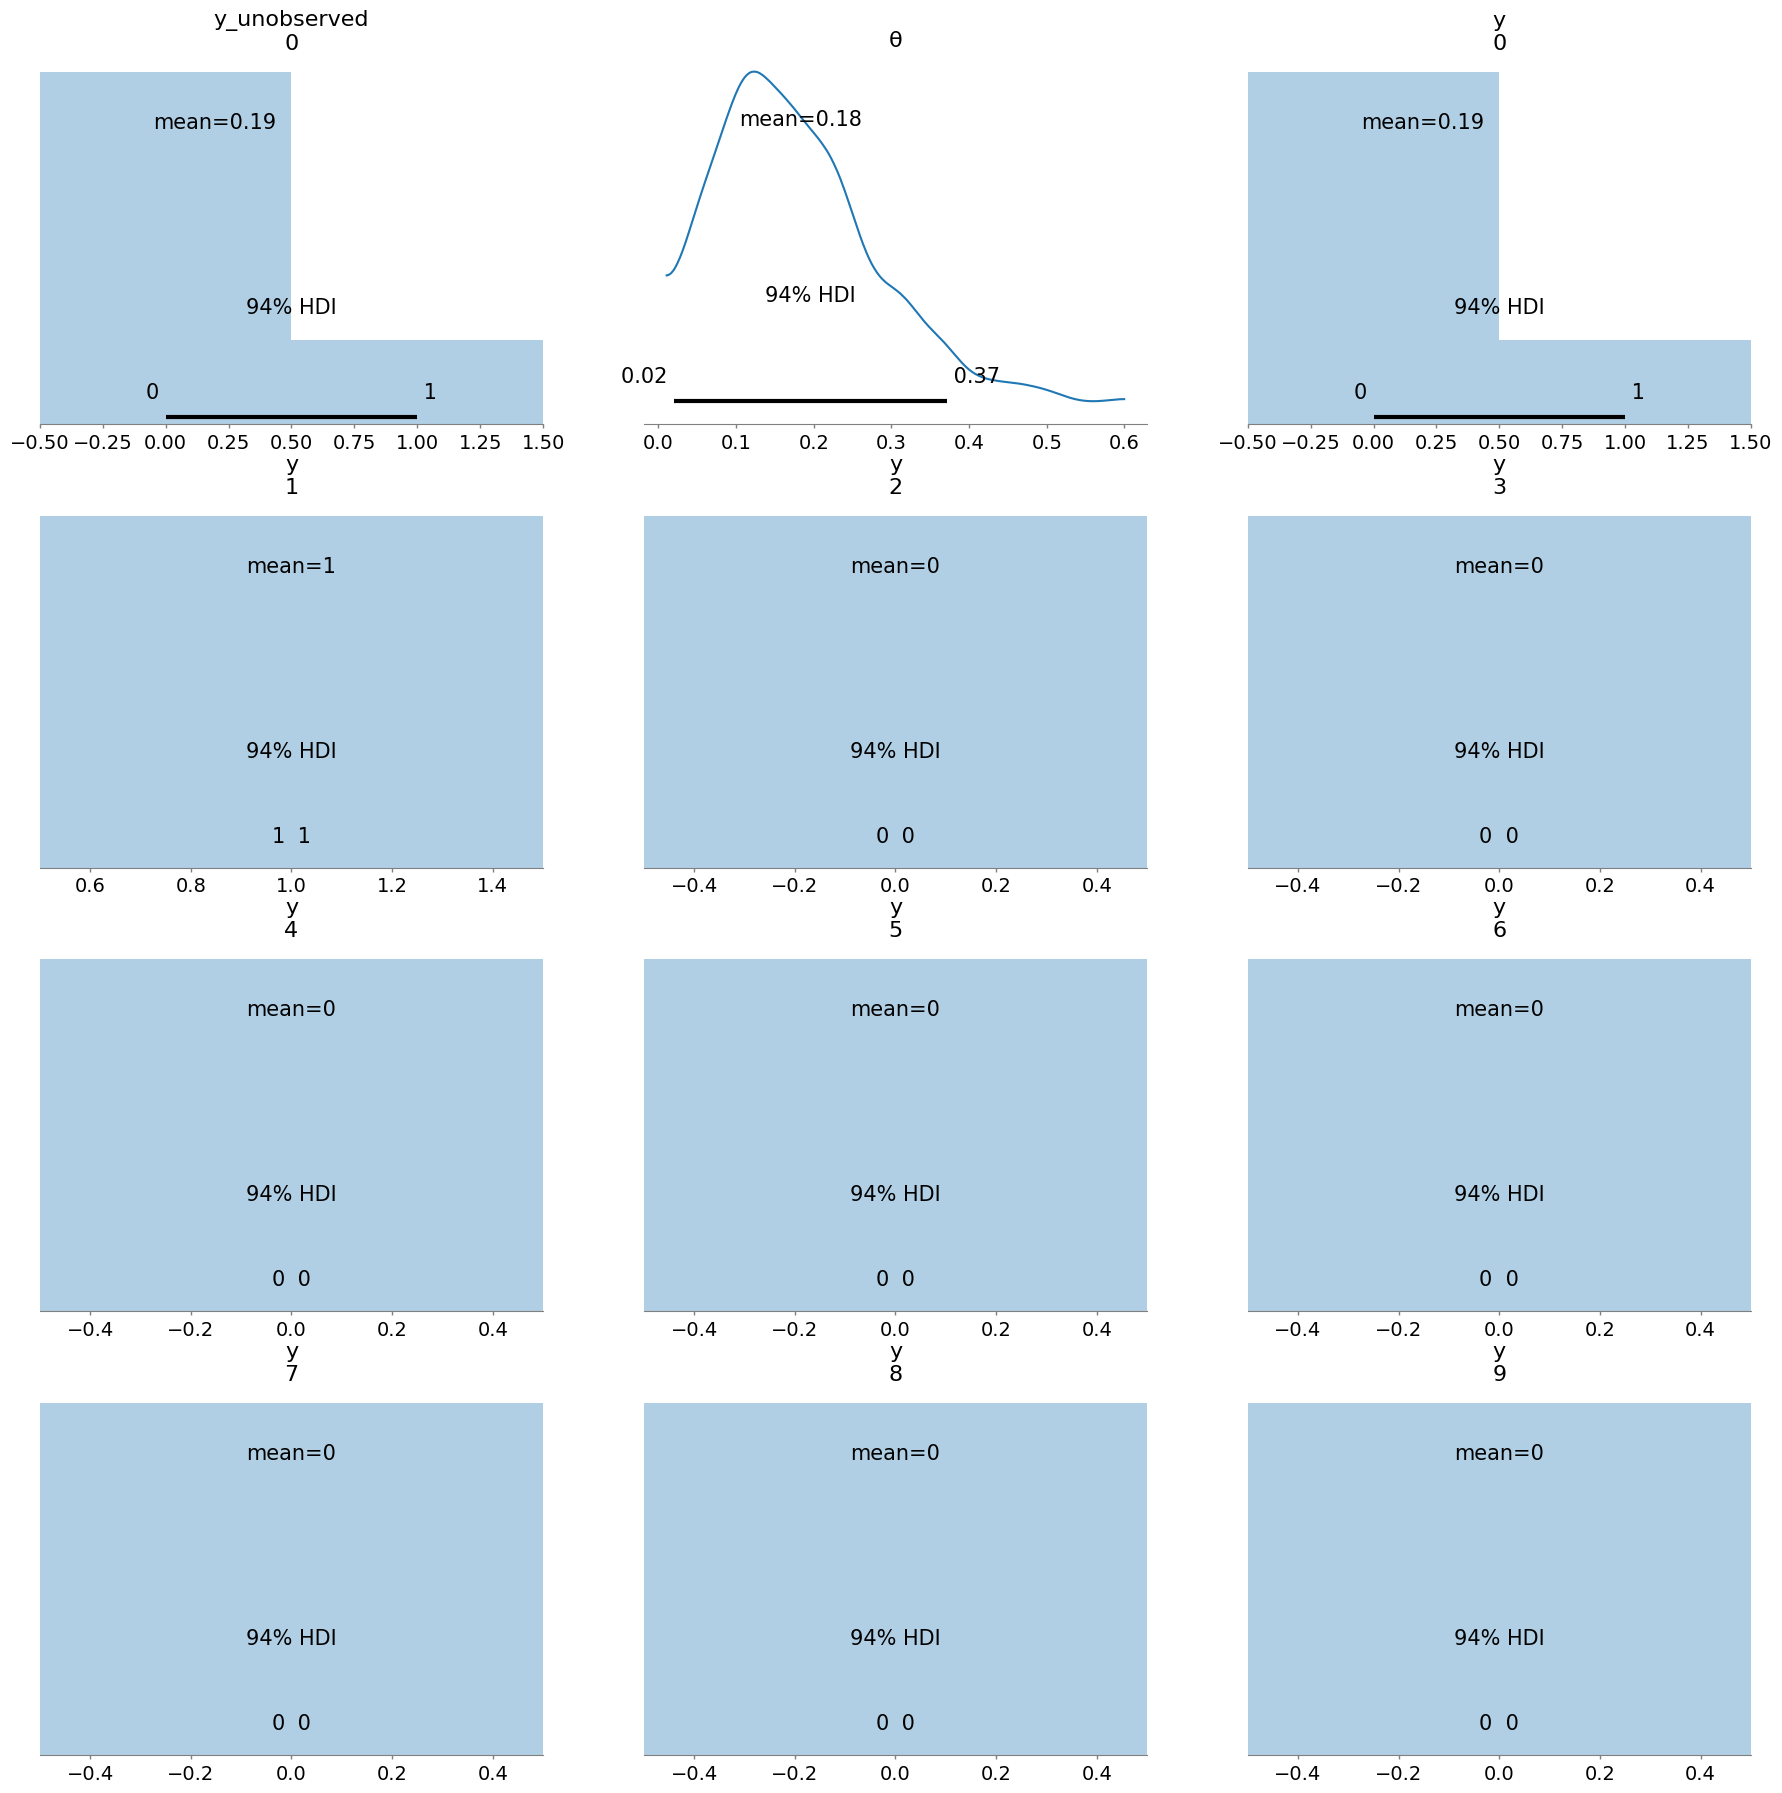

In [ ]:
alpha_prior, beta_prior = selected_beta_params
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=alpha_prior, beta=beta_prior)
    y = pm.Bernoulli('y', p=θ, observed=np.array(n_heads) / np.array(n_trials))
    idata = pm.sample(500, tune=500, random_seed=4591)

az.plot_posterior(idata)
plt.savefig("beta_binomial_posterior_pymc.png")
